In [434]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
import os 
import results_utils

from pathlib import Path


This notebook is simply to obtain the results from the experiments and make plots and tables for the report

In [435]:

root = Path("../runs")

data = results_utils.aggregate_grid_results(root_dir=root, strategy="passive", dataset="iris", task="classification", metric="val_macro_f1", maximize=True)
print("iris")
print(f"lr: {data.iloc[0]['lr']} wd: {data.iloc[0]['weight_decay']} momentum: {data.iloc[0]['momentum']} val_f1_macro_mean: {data.iloc[0]['val_macro_f1_mean']} val_f1_macro_std: {data.iloc[0]['val_macro_f1_std']}")

data = results_utils.aggregate_grid_results(root_dir=root, strategy="passive", dataset="banknote", task="classification", metric="val_macro_f1", maximize=True)
print("banknote")
print(f"lr: {data.iloc[0]['lr']} wd: {data.iloc[0]['weight_decay']} momentum: {data.iloc[0]['momentum']} val_f1_macro_mean: {data.iloc[0]['val_macro_f1_mean']} val_f1_macro_std: {data.iloc[0]['val_macro_f1_std']}")

data = results_utils.aggregate_grid_results(root_dir=root, strategy="passive", dataset="mnist", task="classification", metric="val_macro_f1", maximize=True)
print("mnist")
print(f"lr: {data.iloc[0]['lr']} wd: {data.iloc[0]['weight_decay']} momentum: {data.iloc[0]['momentum']} val_f1_macro_mean: {data.iloc[0]['val_macro_f1_mean']} val_f1_macro_std: {data.iloc[0]['val_macro_f1_std']}")

data = results_utils.aggregate_grid_results(root_dir=root, strategy="passive", dataset="sine1d", task="regression", metric="val_r2", maximize=True)
print("sine1d")
print(f"lr: {data.iloc[0]['lr']} wd: {data.iloc[0]['weight_decay']} momentum: {data.iloc[0]['momentum']} val_r2_mean: {data.iloc[0]['val_r2_mean']} val_r2_std: {data.iloc[0]['val_r2_std']}")

data = results_utils.aggregate_grid_results(root_dir=root, strategy="passive", dataset="energy", task="regression", metric="val_r2", maximize=True)
print("energy")
print(f"lr: {data.iloc[0]['lr']} wd: {data.iloc[0]['weight_decay']} momentum: {data.iloc[0]['momentum']} val_r2_mean: {data.iloc[0]['val_r2_mean']} val_r2_std: {data.iloc[0]['val_r2_std']}")

data = results_utils.aggregate_grid_results(root_dir=root, strategy="passive", dataset="friedman1", task="regression", metric="val_r2", maximize=True)
print("friedman1")
print(f"lr: {data.iloc[0]['lr']} wd: {data.iloc[0]['weight_decay']} momentum: {data.iloc[0]['momentum']} val_r2_mean: {data.iloc[0]['val_r2_mean']} val_r2_std: {data.iloc[0]['val_r2_std']}")


iris
lr: 0.1 wd: 0.0001 momentum: 0.5 val_f1_macro_mean: 1.0 val_f1_macro_std: 0.0
banknote
lr: 0.1 wd: 0.0001 momentum: 0.9 val_f1_macro_mean: 0.9862824400285528 val_f1_macro_std: 0.01991255749514306
mnist
lr: 0.1 wd: 0.001 momentum: 0.9 val_f1_macro_mean: 0.8645504145328037 val_f1_macro_std: 0.009586692652235563
sine1d
lr: 0.1 wd: 0.0001 momentum: 0.9 val_r2_mean: 0.9091667798245423 val_r2_std: 0.01876240584057163
energy
lr: 0.1 wd: 0.0001 momentum: 0.9 val_r2_mean: 0.8753046940995305 val_r2_std: 0.02558488981623854
friedman1
lr: 0.1 wd: 0.0001 momentum: 0.9 val_r2_mean: 0.8599363389339111 val_r2_std: 0.04058064982248077


In [115]:
def simple_df(Path, task):
    df = pd.read_csv(Path)
    if task == "task_classification":
        simple = df.groupby('iteration').mean(numeric_only=True)[['test_accuracy', "test_macro_f1", "bp_examples"]]
        simple['test_accuracy_std'] = df.groupby('iteration').std(numeric_only=True)['test_accuracy']
        simple['test_macro_f1_std'] = df.groupby('iteration').std(numeric_only=True)['test_macro_f1']
        simple = simple.reset_index()
        return simple
    simple = df.groupby('iteration').mean(numeric_only=True)[['test_r2', "bp_examples"]]
    simple['test_r2_std'] = df.groupby('iteration').std(numeric_only=True)['test_r2']
    simple = simple.reset_index()
    return simple
   

In [59]:
passive_iris = Path("../runs/passive/iris/task_classification")
df = simple_df(os.path.join(passive_iris, "curves_seeds_0_to_4.csv"))

In [64]:
df_sas = simple_df(Path("../runs/sasla/iris/task_classification/curves_seeds_0_to_4.csv"))
df_us = simple_df(Path("../runs/us/iris/task_classification/curves_seeds_0_to_4.csv"))

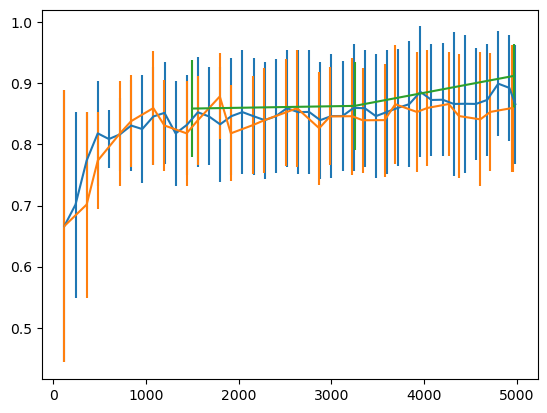

In [65]:
plt.errorbar(y = df['test_macro_f1'], x = df['bp_examples'], yerr=df['test_macro_f1_std'])
plt.errorbar(y = df_sas['test_macro_f1'], x = df_sas['bp_examples'], yerr=df_sas['test_macro_f1_std'], )
plt.errorbar(y = df_us['test_macro_f1'], x = df_us['bp_examples'], yerr=df_us['test_macro_f1_std'], )

plt.show()

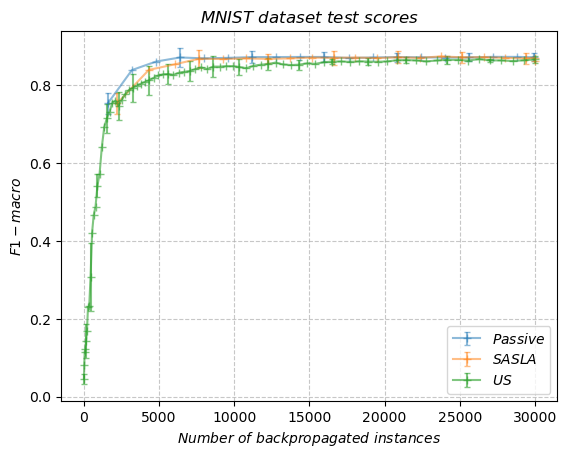

In [460]:
curve = "curves_seeds_0_to_4.csv"
task = "task_classification"
ds = "mnist"
path1 = os.path.join("../runs/", "passive",ds, task, curve)
path2 = os.path.join("../runs/", "sasla", ds, task,curve)
path3 = os.path.join("../runs/", "us", ds, task, curve)

df = simple_df(path1, task)
df_sas = simple_df(path2, task)
df_us = simple_df(path3, task)
plt.errorbar(y = df['test_macro_f1'], x = df['bp_examples'], yerr=df['test_macro_f1_std'], linestyle='solid',
             capsize=2,
             marker='+', alpha=0.5, errorevery=3)
plt.errorbar(y = df_sas['test_macro_f1'], x = df_sas['bp_examples'], yerr=df_sas['test_macro_f1_std'],  linestyle='solid',
             capsize=2,
             marker='+', alpha=0.5, errorevery=3)
plt.errorbar(y = df_us['test_macro_f1'], x = df_us['bp_examples'], yerr=df_us['test_macro_f1_std'],  linestyle='solid',
             capsize=2,
             marker='+', alpha=0.6, errorevery=4)
plt.legend(("p", "s"))
plt.legend(("$Passive$", "$SASLA$", "$US$"))
plt.xlabel(r"$Number\ of\ backpropagated\ instances$")
plt.ylabel(r"$F1-macro$")
plt.title(r"$MNIST\ dataset\ test\ scores$")
plt.grid(True, linestyle='--', alpha=0.7) 
plt.savefig(f"{ds}.png", dpi=300)
plt.show()

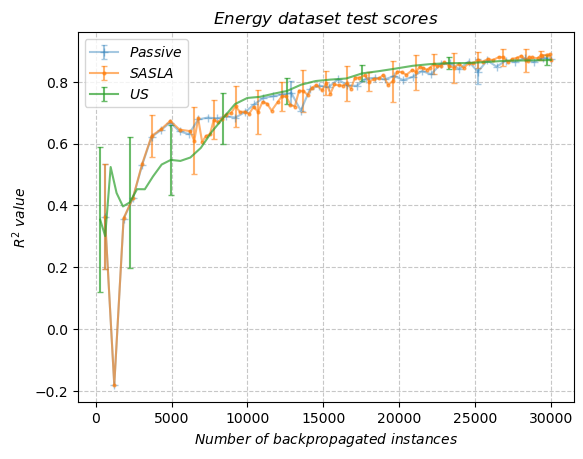

In [433]:
curve = "curves_seeds_0_to_4.csv"
task = "task_regression"
ds = "energy"
path1 = os.path.join("../runs/", "passive",ds,  task, curve)
path2 = os.path.join("../runs/", "sasla", ds, task,curve)
path3 = os.path.join("../runs/", "us", ds, task, curve)

df = simple_df(path1, task)
df_sas = simple_df(path2, task)
df_us = simple_df(path3, task)

plt.errorbar(y = df['test_r2'], 
             x = df['bp_examples'], 
             yerr=df['test_r2_std'], 
             linestyle='solid',
             capsize=2,
             marker='+',
             alpha=0.4, errorevery=20)
plt.errorbar(y = df_sas['test_r2'],
             x = df_sas['bp_examples'],
             yerr=df_sas['test_r2_std'],
             marker="o",
             markersize=2, 
             capsize=2, 
             alpha=0.6,  errorevery=5
             )
plt.errorbar(y = df_us['test_r2'],
             x = df_us['bp_examples'], 
             yerr=df_us['test_r2_std'],
             alpha = 0.7,
             capsize=2, errorevery=5
             )
plt.legend(("$Passive$", "$SASLA$", "$US$"))
plt.xlabel(r"$Number\ of\ backpropagated\ instances$")
plt.ylabel(r"$R^2\ value$")
plt.grid(True, linestyle='--', alpha=0.7) 
plt.title(r"$Energy\ dataset\ test\ scores$")
plt.savefig(f"{ds}.png", dpi=300)
plt.show()

In [211]:
df_us

,iteration,test_r2,bp_examples,test_r2_std


In [270]:
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

def wilcoxon_signed_rank_from_df(
    df: pd.DataFrame,
    col_active: str,
    col_passive: str,
    *,
    alternative: str = "greater",  # "greater" tests that active > passive
    alpha: float = 0.05,
    metric_name: str = "score",
    zero_method: str = "wilcox",   # discard zero diffs (SciPy default & standard)
    continuity_correction: bool = False,
):
    """
    Run a paired Wilcoxon signed-rank test on two columns of a DataFrame.

    df should have one row per run (e.g., 5 rows), with columns for the two strategies.
    col_active is the active strategy ("us" or "sasla"), col_passive is "passive".

    Returns (statistic, pvalue) and prints a concise summary.
    """
    pairs = df[[col_active, col_passive]].dropna()
    x = pairs[col_active].to_numpy()
    y = pairs[col_passive].to_numpy()

    if len(x) < 2:
        raise ValueError("Need at least 2 paired observations after dropna().")

    # Wilcoxon on paired samples; by default tests median(x - y) > 0 if alternative="greater"
    stat, p = wilcoxon(
        x, y,
        alternative=alternative,
        zero_method=zero_method,
        correction=continuity_correction,
        mode="auto",
    )

    diffs = x - y
    mean_diff = float(np.mean(diffs))
    median_diff = float(np.median(diffs))

    print(f"{col_active} vs {col_passive} on {metric_name}  (n={len(x)})")
    print(f"W = {stat:.3f}, p = {p:.4g}, alternative = '{alternative}'")
    print(f"mean(active - passive) = {mean_diff:.4f}, median = {median_diff:.4f}")
    print(f"Reject H0 (median diff = 0) at alpha={alpha}: {'YES' if p < alpha else 'NO'}")

    return stat, p

# Example usage (uncomment and adapt to your DataFrames):
# df_us_passive = pd.DataFrame({'us': [...], 'passive': [...]})
# df_sasla_passive = pd.DataFrame({'sasla': [...], 'passive': [...]})

# For classification (F1-macro), one-sided (expecting active >= passive):
# wilcoxon_signed_rank_from_df(df_us_passive, 'us', 'passive', alternative='greater', metric_name='F1-macro')
# wilcoxon_signed_rank_from_df(df_sasla_passive, 'sasla', 'passive', alternative='greater', metric_name='F1-macro')

# For regression (R^2), one-sided:
# wilcoxon_signed_rank_from_df(df_us_passive, 'us', 'passive', alternative='greater', metric_name='R^2')
# wilcoxon_signed_rank_from_df(df_sasla_passive, 'sasla', 'passive', alternative='greater', metric_name='R^2')

# If you prefer a two-sided test, set alternative='two-sided'.


In [438]:
# make the df for the tests 
# starting with iris 
ds = 'iris'
curve = "curves_seeds_0_to_14.csv"
task = "task_regression"
path1 = os.path.join("../runs/", "passive","friedman1", task)
path2 = os.path.join("../runs/", "sasla", "friedman1", task,curve)
path3 = os.path.join("../runs/", "us", "friedman1", task, curve)

In [439]:
def set_up_test_df(data_set = 'iris', task='task_classification', target='test_macro_f1', runs=5):
    bp1 = os.path.join("../runs/", 'passive', data_set, task)
    bp2 = os.path.join("../runs/", 'us', data_set, task)
    bp3 = os.path.join("../runs/", "sasla", data_set, task)

    strats = []
    runs_st1 = []
    runs_st2 = []
    runs_st3 = []
    for i in range(runs):
        p1 = os.path.join(bp1, f"seed_{i}/curve.csv")
        p2 = os.path.join(bp2, f"seed_{i}/curve.csv")
        p3 = os.path.join(bp3, f"seed_{i}/curve.csv")
        
        t1 = pd.read_csv(p1)[target]
        t2 = pd.read_csv(p2)[target]
        t3 = pd.read_csv(p3)[target]
        
        runs_st1.append(t1.iloc[-1])
        runs_st2.append(t2.iloc[-1])
        runs_st3.append(t3.iloc[-1])
        
    strats.append(['passive', runs_st1])
    strats.append(['us', runs_st2])
    strats.append(['sasla', runs_st3])

    cols = ['passive', 'us', 'sasla']
    rows = [runs_st1, runs_st2, runs_st3]
    ts = pd.DataFrame(rows).T
    ts.columns = cols
    return ts

In [457]:
ds= 'iris'
p_us = set_up_test_df(data_set = ds, task='task_classification', target='test_macro_f1', runs=15)
# table
p_us
summary = []
for strat in p_us.columns:
    mean = p_us[strat].mean()
    std = p_us[strat].std()
    summary.append([strat, mean, std])

sumsum = pd.DataFrame(summary, columns=['Strategy', "Mean", "SD"])
sumsum.to_csv(f"{ds}_summary.csv")

In [458]:
sumsum

,Strategy,Mean,SD
0,passive,0.966549,0.037882
1,us,0.973210,0.033963
2,sasla,0.943547,0.110919


In [459]:
p_us['us'] = p_us['us'] + 1e-12
wilcoxon_signed_rank_from_df(p_us[['passive', 'us']], 'us', 'passive')

us vs passive on score  (n=15)
W = 90.000, p = 0.0473, alternative = 'greater'
mean(active - passive) = 0.0067, median = 0.0000
Reject H0 (median diff = 0) at alpha=0.05: YES


(90.0, 0.04730224609375)

,passive,us,sasla
0,1.000000,0.932660,1.000000
1,0.966583,1.000000,0.966583
2,0.966583,1.000000,1.000000
3,0.866667,0.899749,0.932660
4,0.932660,0.966583,0.932660
5,0.966583,0.966583,0.966583
6,0.933333,0.932660,0.932660
7,1.000000,1.000000,1.000000
8,0.932660,0.933333,0.933333
9,0.966583,1.000000,0.966583
